In [1]:
from subprocess import check_output
print(check_output(["ls", "data/"]).decode("utf8"))

air_reserve.csv
air_store_info.csv
air_visit_data.csv
date_info.csv
hpg_reserve.csv
hpg_store_info.csv
sample_submission.csv
store_id_relation.csv



In [2]:
%matplotlib notebook

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import matplotlib.pyplot as plt

data_air_reserve = pd.read_csv('data/air_reserve.csv')
data_air_store_info = pd.read_csv('data/air_store_info.csv')
data_air_visit_data = pd.read_csv('data/air_visit_data.csv')
data_date_info = pd.read_csv('data/date_info.csv')
data_hpg_reserve = pd.read_csv('data/hpg_reserve.csv')
data_hpg_store_info = pd.read_csv('data/hpg_store_info.csv')
data_sample_submission = pd.read_csv('data/sample_submission.csv')
data_store_id_relation = pd.read_csv('data/store_id_relation.csv')

In [3]:
data_air_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [4]:
data_air_store_info.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [5]:
# data_air_visit_data[:3]
data_air_visit_data.loc[:,['air_store_id', 'visitors']].groupby('air_store_id').size()


air_store_id
air_00a91d42b08b08d9    232
air_0164b9927d20bcc3    149
air_0241aa3964b7f861    396
air_0328696196e46f18    116
air_034a3d5b40d5b1b1    251
air_036d4f1ee7285390    281
air_0382c794b73b51ad    298
air_03963426c9312048    429
air_04341b588bde96cd    472
air_049f6d5b402a31b2    258
air_04cae7c1bc9b2a0b    291
air_0585011fa179bcce    273
air_05c325d315cc17f5    468
air_0647f17b4dc041c8    287
air_064e203265ee5753    222
air_066f0221b8a4d533    277
air_06f95ac5c33aca10    401
air_0728814bd98f7367    431
air_0768ab3910f7967f    329
air_07b314d83059c4d2    294
air_07bb665f9cdfbdfb    380
air_082908692355165e    428
air_083ddc520ea47e1e    205
air_0845d8395f30c6bb    281
air_084d98859256acf0    240
air_0867f7bebad6a649    220
air_08ba8cd01b3ba010    459
air_08cb3c4ee6cd6a22    289
air_08ef81d5b7a0d13f    240
air_08f994758a1e76d4    289
                       ... 
air_f6b2489ccf873c3b    470
air_f6bfd27e2e174d16    251
air_f6cdaf7b7fdc6d78    268
air_f8233ad00755c35c    263
air_f85

In [6]:
def fun(x,y):
    if x == 'air_ba937bf13d40fb24':
        return (x,y)
    

df3 = data_air_visit_data.loc[:,['air_store_id', 'visitors']]
df4 = df3.set_index('air_store_id')
# df4.filter(like='air_ba937bf13d40fb24', axis=0)

In [7]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates, columns=['A','B','C','D'])
# df.loc['2013-01-01']
# df.loc[:,['A','B']]
# df
df.A.max

<bound method Series.max of 2013-01-01     0
2013-01-02     4
2013-01-03     8
2013-01-04    12
2013-01-05    16
2013-01-06    20
Freq: D, Name: A, dtype: int64>

In [8]:
# data_air_visit_data['air_store_id'].drop_duplicates().count()
# data_hpg_reserve.info
data_hpg_reserve['hpg_store_id'].drop_duplicates().count()

13325

In [9]:
gpByDate = data_air_visit_data.groupby('visit_date').agg(np.sum)
# gpByDate.plot()

In [10]:
# import calendar
# calendar.day_name['2016-01-13']

from datetime import datetime
datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')
datetime.strptime('2017-12-25', '%Y-%m-%d').weekday()

0

In [11]:
def toWkDay(date):
    return datetime.strptime(date, '%Y-%m-%d').weekday()

weekday_col = data_air_visit_data['visit_date'].apply(toWkDay)
week_day_visit_data = data_air_visit_data.assign(weekday = pd.Series(weekday_col, index=data_air_visit_data.index))

In [12]:
# data_air_visit_data.groupby(['visit_date','weekday']).agg(np.sum)

In [13]:
# groupByWkDay = data_air_visit_data.groupby('weekday').agg(np.sum)
# groupByWkDay

In [14]:
data_air_visit_data['visit_date'].drop_duplicates().count()

478

In [22]:
merged_pd = pd.merge(week_day_visit_data, data_date_info, left_on='visit_date', right_on='calendar_date').drop('calendar_date',1)
merged_pd.head()

,air_store_id,visit_date,visitors,weekday,day_of_week,holiday_flg
0,air_ba937bf13d40fb24,2016-01-13,25,2,Wednesday,0
1,air_25e9888d30b386df,2016-01-13,21,2,Wednesday,0
2,air_fd6aac1043520e83,2016-01-13,40,2,Wednesday,0
3,air_64d4491ad8cdb1c6,2016-01-13,5,2,Wednesday,0
4,air_ee3a01f0c71a769f,2016-01-13,18,2,Wednesday,0


In [16]:
# df2 = merged_pd.drop('air_store_id',1)
# df3 = df2.drop('day_of_week',1)

df2 = merged_pd.loc[:,['visitors', 'weekday', 'holiday_flg']]
df2.groupby(['weekday','holiday_flg']).agg(['count',np.sum])

visitors        
                       count     sum
weekday holiday_flg                 
0       0              27902  461537
        1               3780   82665
1       0              35508  622894
        1                507   13568
2       0              35905  687276
        1                906   20604
3       0              34775  644729
        1               3221   74258
4       0              38723  886341
        1               1628   44667
5       0              37506  990390
        1               1756   42738
6       0              29014  691676
        1                977   24310

In [17]:
data_air_visit_data.loc[:,['visit_date', 'visitors']].groupby('visit_date').agg(np.sum).min()

visitors    1033
dtype: int64

In [18]:
# data_store_id_relation.groupby('air_store_id').count().query('hpg_store_id!=1')
data_store_id_relation.count()

air_store_id    150
hpg_store_id    150
dtype: int64

In [24]:
data_air_store_info.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [25]:
data_hpg_store_info['hpg_area_name'].drop_duplicates().count()

119

In [46]:
data_air_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [56]:
def toDay(date):
    return datetime.strptime(date, '%Y-%m-%d %H:%M:%S')

diff = data_air_reserve['visit_datetime'].apply(toDay) - data_air_reserve['reserve_datetime'].apply(toDay)
diff.head()

0   03:00:00
1   00:00:00
2   00:00:00
3   04:00:00
4   19:00:00
dtype: timedelta64[ns]

In [48]:
print(diff.max(), diff.min(), diff.mean())

(Timedelta('393 days 03:00:00'), Timedelta('0 days 00:00:00'), Timedelta('8 days 07:05:51.044621'))


In [91]:
df4 = data_air_reserve[data_air_reserve.air_store_id=='air_877f79706adbfb06']

df4_diff = df4['visit_datetime'].apply(toDay) - df4['reserve_datetime'].apply(toDay)
df4_diff.head()

0     0 days 03:00:00
3     0 days 04:00:00
19    1 days 02:00:00
26    1 days 05:00:00
272   4 days 01:00:00
dtype: timedelta64[ns]

In [88]:
def toDate(date):
    return str(datetime.strptime(date, '%Y-%m-%d %H:%M:%S').date())

date_diff_col = data_air_reserve['visit_datetime'].apply(toDay) - data_air_reserve['reserve_datetime'].apply(toDay)
reserve_date_col = data_air_reserve['reserve_datetime'].apply(toDate)

df5 = data_air_reserve.assign(date_diff = pd.Series(date_diff_col, index=data_air_visit_data.index))
df5 = df5.assign(reserve_date = pd.Series(reserve_date_col, index=data_air_visit_data.index))

comb_df = pd.merge(df5, data_date_info, left_on='reserve_date', right_on='calendar_date')
comb_df = comb_df.drop('calendar_date', 1)
comb_df = comb_df.drop('visit_datetime', 1)
comb_df = comb_df.drop('reserve_datetime', 1)

comb_df.head()

,air_store_id,reserve_visitors,date_diff,reserve_date,day_of_week,holiday_flg
0,air_877f79706adbfb06,1,03:00:00,2016-01-01,Friday,1
1,air_db4b38ebe7a7ceff,3,00:00:00,2016-01-01,Friday,1
2,air_db4b38ebe7a7ceff,6,00:00:00,2016-01-01,Friday,1
3,air_877f79706adbfb06,2,04:00:00,2016-01-01,Friday,1
4,air_db80363d35f10926,5,19:00:00,2016-01-01,Friday,1


In [187]:
mon_xholiday = comb_df[(comb_df.air_store_id == 'air_877f79706adbfb06') & (comb_df.day_of_week == 'Monday') & (comb_df.holiday_flg == 0)]
mon_xholiday2 = mon_xholiday[mon_xholiday.reserve_date == '2016-01-04']
mon_xholiday2.loc[:,['reserve_visitors','date_diff']]

,reserve_visitors,date_diff
116,2,4 days 01:00:00
134,2,12 days 11:00:00
138,2,26 days 01:00:00
139,3,36 days 01:00:00
140,4,42 days 03:00:00


<IPython.core.display.Javascript object>


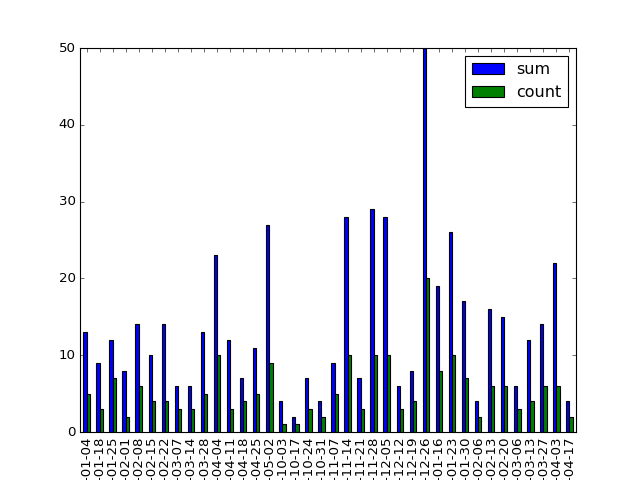

In [198]:
mon_xholiday3 = mon_xholiday.groupby('reserve_date').agg([np.sum,'count'])
mon_xholiday3.loc[:,'reserve_visitors'].plot.bar()

In [200]:
one_shop_df = comb_df[comb_df.air_store_id == 'air_877f79706adbfb06']
date_index = one_shop_df['reserve_date'].drop_duplicates()
df7 = pd.DataFrame( index=date_index)
pd.concat([df7, mon_xholiday3]).dropna(axis=0, how='all').loc[:,['reserve_visitors']].head()


reserve_visitors      
                          sum count
reserve_date                       
2016-01-04               13.0   5.0
2016-01-18                9.0   3.0
2016-01-25               12.0   7.0
2016-02-01                8.0   2.0
2016-02-08               14.0   6.0

In [208]:
# file_name = 'mon_xholiday_291220171510.csv'
# mon_xholiday3.loc[:,'reserve_visitors'].to_csv(file_name, sep=',')
# file_name2 = 'combine_291220171510.csv'
# comb_df.to_csv(file_name2, sep=',')